In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import warnings

#parametros para los graficos
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

/var/folders/dh/3l29khbn1cq3dss6cwgvbkhw0000gn/T/ipykernel_3464/2755930084.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Financial Data and Preprocessing 

## Getting data from Yahoo Finance

### 1. Import the libraries:

In [3]:
import pandas as pd 
import yfinance as yf
import numpy as np

### 2. Download the data:

In [4]:
df = yf.download('AAPL', 
                       start='2000-01-01', 
                       end='2010-12-31',
                       progress=False)

Inspect the data:

In [5]:
print(f'Downloaded {df.shape[0]} rows of data.')
df.head()

Downloaded 2766 rows of data.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.847207,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.775779,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.787131,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719014,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.753073,460734400



## Converting prices to returns
### How to do it...

2. keep the adjusted close prices only:

In [6]:
# keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

### 3. Convert adjusted close prices to simple and log returns:

In [7]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

Inspect the output:

In [10]:
df.head(5)

,adj_close,simple_rtn,log_rtn
Date,,,
2000-01-03,0.847207,NaN,NaN
2000-01-04,0.775779,-0.084310,-0.088077
2000-01-05,0.787131,0.014633,0.014527
2000-01-06,0.719014,-0.086538,-0.090514
2000-01-07,0.753073,0.047369,0.046281


## Changing frequency - Volatility

0. Obtain the simple returns in case of starting in this recipe:

In [9]:
df_v = df

In [10]:
df_v

,adj_close,simple_rtn,log_rtn
Date,,,
2000-01-03,0.847207,NaN,NaN
2000-01-04,0.775779,-0.084310,-0.088077
2000-01-05,0.787131,0.014633,0.014527
2000-01-06,0.719014,-0.086539,-0.090514
2000-01-07,0.753073,0.047369,0.046281
...,...,...,...
2010-12-23,9.796758,-0.004797,-0.004809
2010-12-27,9.829451,0.003337,0.003332
2010-12-28,9.853370,0.002433,0.002430


In [11]:
#Me quedo solo con los returns log y eliminos nulos
df_v.drop(['adj_close', 'simple_rtn'], axis='columns', inplace=True)
df_v.dropna(axis=0, inplace=True)
df_v.head()

,log_rtn
Date,
2000-01-04,-0.088077
2000-01-05,0.014527
2000-01-06,-0.090514
2000-01-07,0.046281
2000-01-10,-0.017744


## 4. Define the function for calculating the realized volatility

In [12]:
## La formula de la volatilidad es sencilla la raiz cuadrada del del sumatorio de los cuadrados
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

### Calculate monthly realized volatility:

In [13]:
df_rv = df_v.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)

In [14]:
df_rv

,rv
Date,
2000-01-31,0.236246
2000-02-29,0.147841
2000-03-31,0.243592
2000-04-30,0.212513
2000-05-31,0.184990
...,...
2010-08-31,0.060305
2010-09-30,0.065953
2010-10-31,0.069618


### 5 Graficos

#### Annualize the values:

In [15]:
df_rv.rv = df_rv.rv * np.sqrt(12)

In [16]:
df_rv

,rv
Date,
2000-01-31,0.818381
2000-02-29,0.512135
2000-03-31,0.843827
2000-04-30,0.736166
2000-05-31,0.640824
...,...
2010-08-31,0.208901
2010-09-30,0.228469
2010-10-31,0.241162


#### Plot the results:

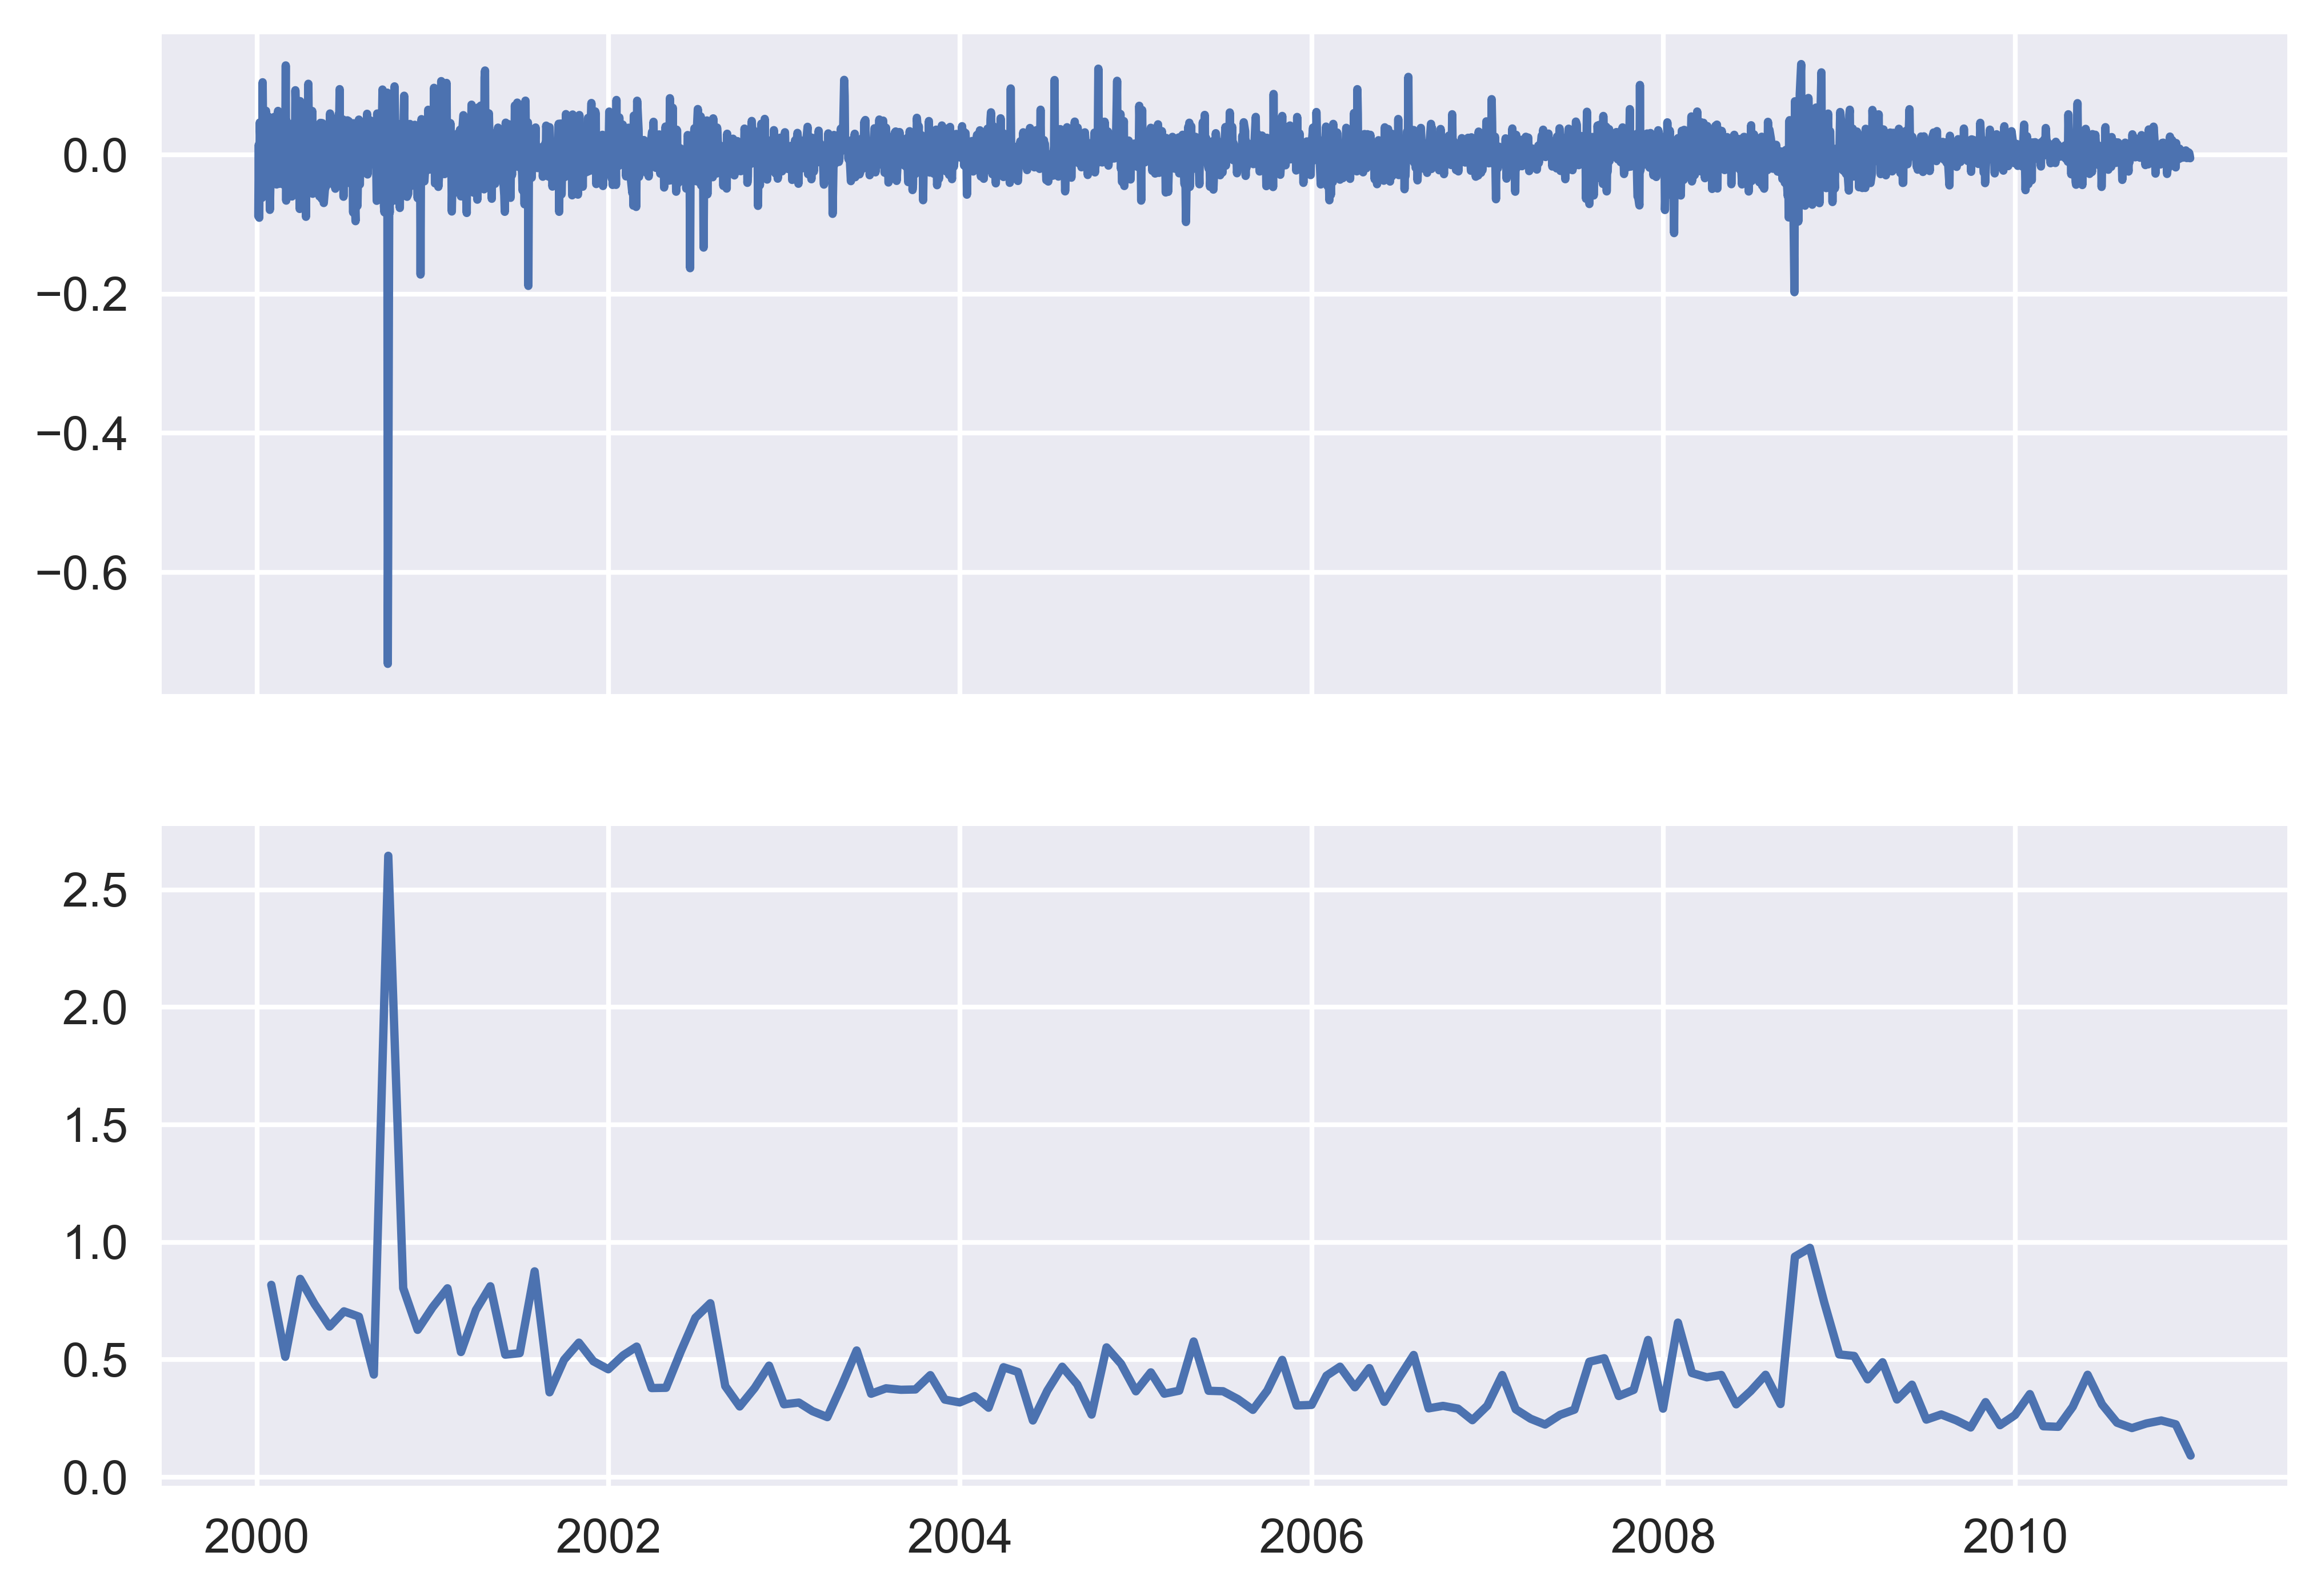

In [17]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[1].plot(df_rv)

# plt.tight_layout()
# plt.savefig('images/ch1_im6.png')
plt.show()